In [1]:
"""
Word Mover's Distance
=====================

It's Gensim's implemenation of the WMD.

Word Mover's Distance (WMD) enables us to assess the "distance" between two 
documents in a meaningful way even when they have no words in common. 
It uses `word2vec <http://rare-technologies.com/word2vec-tutorial/>`_  vector 
embeddings of words.
"""

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300') # model that will be used for embeddings

[==================================================] 100.0% 1662.8/1662.8MB downloaded


#### Load data

In [23]:
type_of_processing = 'custom_tokenized'

with open("/content/mt.txt") as f:
    cands = [line.strip() for line in f]

with open("/content/reference.txt") as f:
    refs = [line.strip() for line in f]

In [ ]:
human_score = pd.read_csv('newstest2015.human.de-en', names=['wmt_human_score'], dtype=float)
metric_scores = pd.DataFrame(data={'wmt_human_score': human_score['wmt_human_score']})

#### Run metric function

In [24]:
wmd_scores = []

for i, ref in enumerate(refs):
    hyp = preprocess(cands[i])
    ref = preprocess(ref)
    dist = model.wmdistance(ref, hyp)
    wmd_scores.append(dist)

In [ ]:
metric_scores[f'wmd_{type_of_processing}'] = wmd_scores

You can load other data with different preprocessing techniques, add them to metric_scores DF and check how preprocessing affects correlation

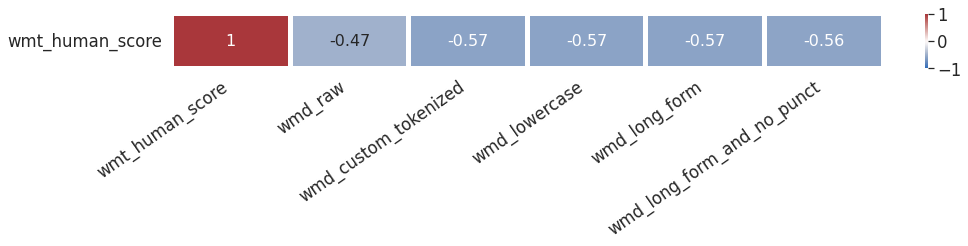

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 1)})
sns.set(font_scale=1.5)

m = metric_scores.corr().round(4)[:1]

fig = sns.heatmap(m, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', annot_kws={"size": 16},
                 cbar_kws={'fraction' : 0.1}, linewidth=4)

fig.set_xticklabels(fig.get_xticklabels(), rotation=35, horizontalalignment='right')
fig.set_yticklabels(fig.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

In [27]:
import pickle
with open(f'wmd_scores_15_{type_of_processing}.pickle', 'wb') as f:
    pickle.dump(wmd_scores_lc, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Run WMD on the same sentences as for MoverScore to campare both metrics
l = []
sentence_obama = preprocess('Obama speaks to the media in Illinois')

sentence_obama3 = preprocess('Obama meets the media in Illinois')
distance3 = model.wmdistance(sentence_obama, sentence_obama3)
l.append([sentence_obama, sentence_obama3, distance3])

sentence_obama4 = preprocess('Obama speaks to the media')
distance4 = model.wmdistance(sentence_obama, sentence_obama4)
l.append([sentence_obama, sentence_obama4, distance4])

sentence_obama4 = preprocess('in Illinois Obama to the media speaks')
distance4 = model.wmdistance(sentence_obama, sentence_obama4)
l.append([sentence_obama, sentence_obama4, distance4])

sentence_obama4 = preprocess('He speaks to the media in Illinois')
distance4 = model.wmdistance(sentence_obama, sentence_obama4)
l.append([sentence_obama, sentence_obama4, distance4])

sentence_obama4 = preprocess('Obama hates the media in Illinois')
distance4 = model.wmdistance(sentence_obama, sentence_obama4)
l.append([sentence_obama, sentence_obama4, distance4])

s1 = preprocess('speaks')
s2 = preprocess('hates')
d = model.wmdistance(s1, s2)
l.append([s1, s2, d])

for i, (x, y, z) in enumerate(l):
    print()
    print("{}. Ref: {:<42} Hyp: {:<42} WMD score: {}".format(i+1, str(x), str(y), round(z, 4)))